In [1]:
import replicate, os, requests
from dotenv import load_dotenv
from IPython.display import display, Image
from datetime import datetime
from pathlib import Path

# Load environment
load_dotenv()
os.environ["REPLICATE_API_TOKEN"] = os.getenv("REPLICATE_API_TOKEN")

# Create output directory
Path("results/glyphs").mkdir(parents=True, exist_ok=True)


In [2]:
from IPython.display import display, Image
from datetime import datetime
from pathlib import Path

# Load environment
load_dotenv()
os.environ["REPLICATE_API_TOKEN"] = os.getenv("REPLICATE_API_TOKEN")

# Create output directory
Path("results/glyphs").mkdir(parents=True, exist_ok=True)


In [12]:
def generate_glyph(entity, element, emotion):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{entity.lower()}_{element.lower()}_{emotion.lower()}_{timestamp}.webp"
    filepath = f"results/glyphs/{filename}"

    prompt = f"""
    Create a [MYTHRA] glyph that expresses the essence of a dreamseed formed from:
    - Entity: {entity}
    - Element: {element}
    - Emotion: {emotion}

    This [MYTHRA] glyph should:

– Etch the {entity} in radiant shimmering metallic ink on a black background  
– Use precise, clean, resonant linework, like sacred geometry or trance-drawn calligraphy to represent the {entity}
– Emanate archetypal power: spirals, radial symmetry, elemental flow, symbolic portals  
– Evoke the spirit of ancient sigils, cave carvings, tantric yantras, and celestial inscriptions  
– Glow softly, as if illuminated from within by the energy of {emotion} and the movement of {element}  
– Serve as a living symbol: both map and magnet for transformation  
– A glyph worthy of being painted on the body, engraved on stone, or projected into dreamspace
    """

    output = replicate.run(
        "conorbyrnes04/matrka_glyph_1:bce3b7b3017a5ad64f2b43c8bdaec606a4f64e8a5e0671243a9f53e9c37a7e75",
        input={
            "prompt": prompt,
            "model": "dev",
            "go_fast": False,
            "lora_scale": 1,
            "megapixels": "1",
            "num_outputs": 1,
            "aspect_ratio": "1:1",
            "output_format": "webp",
            "guidance_scale": 3,
            "output_quality": 80,
            "prompt_strength": 0.8,
            "extra_lora_scale": 1,
            "num_inference_steps": 28
        }
    )

    img_url = output[0]
    img_data = requests.get(img_url).content

    with open(filepath, "wb") as f:
        f.write(img_data)

    print(f"🌱 Saved glyph to: {filepath}")
    display(Image(filename=filepath))
    return filepath


In [4]:
print("🔑 Token ends with:", os.environ["REPLICATE_API_TOKEN"][-6:])


🔑 Token ends with: 3MVIha


🌱 Saved glyph to: results/glyphs/lobster_fire_joy_20250717_173002.webp


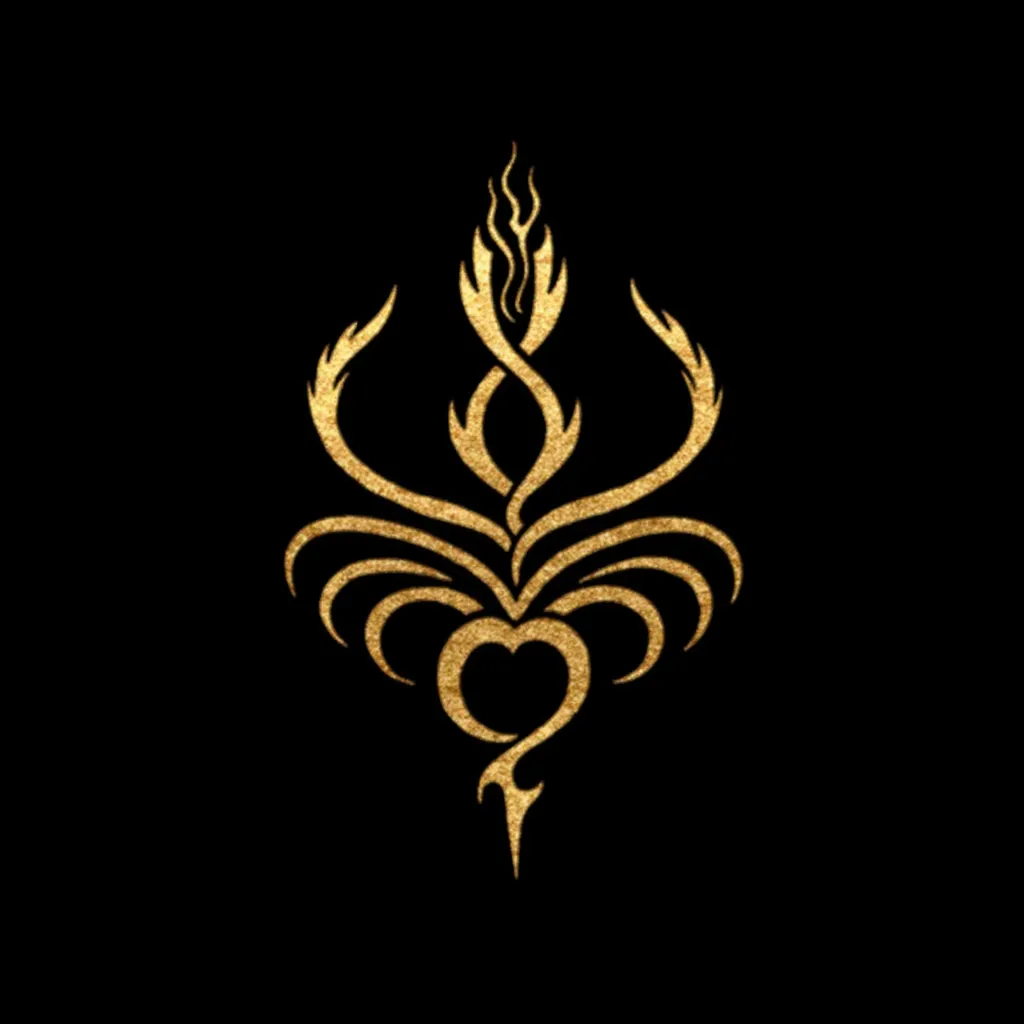

'results/glyphs/lobster_fire_joy_20250717_173002.webp'

In [14]:
# Change inputs to test different symbolic combinations
generate_glyph("Lobster", "Fire", "Joy")


In [ ]:
def view_codex():
    glyph_dir = Path("results/glyphs")
    images = sorted(glyph_dir.glob("*.webp"))

    html = "<h2>🌀 MYTHRA Glyph Codex</h2><div style='display:flex;flex-wrap:wrap;'>"
    for img in images:
        html += f"<div style='margin:10px;text-align:center;'><img src='{img}' width='160'><br><small>{img.stem}</small></div>"
    html += "</div>"

    display(HTML(html))

# Call to display gallery
view_codex()
